In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [5]:
customer_demo=pd.read_excel("CustomerDemographics.xlsx")
customer_demo.head(2)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,current,M,30,MEDIUM,26.4,9,9,355,0
1,11491,current,M,37,LOW,14.4,7,7,485,0


In [194]:
customer_demo.shape

(20000, 10)

In [7]:
customer_behav=pd.read_excel("CustomerBehaviorData.xlsx")
customer_behav.head(2)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,2017.46,29066.66,15919.84,2197.00,3752.00,29798.00,1.0,4,35,...,47,20,41860.0,32734.75,80959.0,36,9,171200.0,Y,3448.84
1,11491,7687.00,1308.00,41888.92,2216.92,7060.53,3143.36,2.0,27,50,...,0,8,113367.0,60974.75,495080.0,5,3,15694.0,Y,3812.69


In [198]:
customer_behav.shape

(20000, 39)

In [9]:
customer_cons=pd.read_excel("CreditConsumptionData.xlsx")
customer_cons.head(2)

,ID,cc_cons
0,17051,16239.0
1,11491,39002.0


In [16]:
customer_cons.shape

(20000, 2)

### CONCAT THE DATA

In [11]:
data = customer_demo.merge(customer_behav, on='ID', how='inner').merge(customer_cons, on='ID', how='inner')
data

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,17051,current,M,30,MEDIUM,26.4,9,9,355,0,...,20,41860.0,32734.75,80959.00,36,9,171200.0,Y,3448.84,16239.0
1,11491,current,M,37,LOW,14.4,7,7,485,0,...,8,113367.0,60974.75,495080.00,5,3,15694.0,Y,3812.69,39002.0
2,7433,current,M,33,MEDIUM,3.2,1,1,764,0,...,14,168000.0,425802.96,115707.38,7,58,28058.0,Y,9432.90,21182.0
3,14606,current,M,63,LOW,10.2,6,6,863,0,...,44,57750.0,25537.91,63606.00,12,0,24459.0,Y,144.61,8123.0
4,8381,saving,M,33,MEDIUM,26.4,6,6,523,0,...,2,18405.0,64687.32,62353.35,49,35,31574.0,Y,1887.89,28282.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,current,M,35,MEDIUM,13.5,1,1,523,0,...,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88,NaN
19996,14224,current,M,53,MEDIUM,9.9,7,7,723,1,...,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30,NaN
19997,18740,current,M,62,HIGH,37.8,8,8,863,1,...,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34,NaN
19998,18134,current,M,34,MEDIUM,12.6,4,4,882,0,...,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29,NaN


### EXTRACT TEST DATA

In [13]:
train_data=data[data['cc_cons'].notnull()]
train_data

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,17051,current,M,30,MEDIUM,26.4,9,9,355,0,...,20,41860.0,32734.75,80959.00,36,9,171200.0,Y,3448.84,16239.0000
1,11491,current,M,37,LOW,14.4,7,7,485,0,...,8,113367.0,60974.75,495080.00,5,3,15694.0,Y,3812.69,39002.0000
2,7433,current,M,33,MEDIUM,3.2,1,1,764,0,...,14,168000.0,425802.96,115707.38,7,58,28058.0,Y,9432.90,21182.0000
3,14606,current,M,63,LOW,10.2,6,6,863,0,...,44,57750.0,25537.91,63606.00,12,0,24459.0,Y,144.61,8123.0000
4,8381,saving,M,33,MEDIUM,26.4,6,6,523,0,...,2,18405.0,64687.32,62353.35,49,35,31574.0,Y,1887.89,28282.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,current,F,53,LOW,3.9,10,10,914,1,...,25,142966.0,1828521.13,349670.00,58,24,80688.0,Y,78966.76,8324.4592
14996,10376,current,M,44,MEDIUM,16.2,4,4,683,1,...,4,32841.0,222598.14,131979.75,1,6,60164.0,Y,4762.10,3147.6088
14997,2181,current,M,37,MEDIUM,1.5,10,10,394,0,...,34,21350.0,80930.21,8005.00,9,18,41702.0,Y,2877.33,11803.9860
14998,18417,current,M,220,MEDIUM,18.9,9,9,647,0,...,81,50135.0,16439.99,69191.43,3,13,239.0,Y,13006.84,3640.4420


### EXTRACT PREDICT DATA

In [15]:
predict_data=data[data['cc_cons'].isnull()]
predict_data

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
15000,17591,current,M,37,MEDIUM,11.9,4,4,575,1,...,20,9750.0,30527.88,31271.00,3,12,25945.92,Y,1170.49,NaN
15001,13541,current,M,33,MEDIUM,7.8,6,6,394,0,...,40,16967.0,14342.83,16582.00,6,39,12214.00,Y,16447.45,NaN
15002,13431,current,M,53,LOW,33.0,10,10,324,1,...,35,36398.0,32503.16,33539.54,5,9,13215.00,Y,2622.28,NaN
15003,8687,current,M,33,MEDIUM,7.8,5,5,370,1,...,5,97825.0,93572.42,109429.75,21,0,72317.00,Y,340.79,NaN
15004,14727,current,M,62,LOW,12.6,9,9,505,1,...,75,27936.0,19011.50,41401.00,6,35,42344.00,Y,2812.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,current,M,35,MEDIUM,13.5,1,1,523,0,...,11,32944.0,105488.53,125470.83,21,50,58037.00,Y,7870.88,NaN
19996,14224,current,M,53,MEDIUM,9.9,7,7,723,1,...,8,8850.0,77112.66,86559.00,62,38,24110.00,Y,3668.30,NaN
19997,18740,current,M,62,HIGH,37.8,8,8,863,1,...,108,35819.0,57192.48,80627.00,2,18,1769.00,Y,5450.34,NaN
19998,18134,current,M,34,MEDIUM,12.6,4,4,882,0,...,12,39083.0,82039.00,24332.00,117,64,37255.00,Y,59.29,NaN


In [210]:
train_data.head(2)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,17051,current,M,30,MEDIUM,26.4,9,9,355,0,...,20,41860.0,32734.75,80959.0,36,9,171200.0,Y,3448.84,16239.0
1,11491,current,M,37,LOW,14.4,7,7,485,0,...,8,113367.0,60974.75,495080.0,5,3,15694.0,Y,3812.69,39002.0


## TRAIN DATA
### DROP THE ID

In [17]:
train_data.drop(columns=['ID'],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\87159150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(columns=['ID'],inplace=True)


In [214]:
train_data.head(2)

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,current,M,30,MEDIUM,26.4,9,9,355,0,2017.46,...,20,41860.0,32734.75,80959.0,36,9,171200.0,Y,3448.84,16239.0
1,current,M,37,LOW,14.4,7,7,485,0,7687.00,...,8,113367.0,60974.75,495080.0,5,3,15694.0,Y,3812.69,39002.0


In [216]:
train_data.dtypes

account_type                     object
gender                           object
age                               int64
Income                           object
Emp_Tenure_Years                float64
Tenure_with_Bank                  int64
region_code                       int64
NetBanking_Flag                   int64
Avg_days_between_transaction      int64
cc_cons_apr                     float64
dc_cons_apr                     float64
cc_cons_may                     float64
dc_cons_may                     float64
cc_cons_jun                     float64
dc_cons_jun                     float64
cc_count_apr                    float64
cc_count_may                      int64
cc_count_jun                      int64
dc_count_apr                      int64
dc_count_may                      int64
dc_count_jun                      int64
card_lim                          int64
personal_loan_active              int64
vehicle_loan_active               int64
personal_loan_closed            float64


### NULL CHECK

In [218]:
train_data.isnull().sum()

account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     1
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    1
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            1
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3                    2
investment_4  

In [220]:
train_data.columns

Index(['account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

In [19]:
catagorical_column=['account_type','gender','loan_enq','Income']

In [224]:
print(len(catagorical_column))

4


In [21]:
numerical_column=['age','Emp_Tenure_Years','Tenure_with_Bank','region_code', 'NetBanking_Flag','Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr','cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun','cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr','dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active','vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed','investment_1', 'investment_2', 'investment_3', 'investment_4','debit_amount_apr', 'credit_amount_apr', 'debit_count_apr','credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may','credit_amount_may', 'credit_count_may', 'debit_count_may','max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun','credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun','emi_active', 'cc_cons']

In [228]:
print(len(numerical_column))

44


In [23]:
for cat in catagorical_column:
    if train_data[cat].isnull().any():
        mode=train_data[cat].mode()[0]
        train_data[cat].fillna(mode,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\286505718.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[cat].fillna(mode,inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\286505718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[cat].fillna(mode,inplace=True)


In [25]:
for num in numerical_column:
    if train_data[num].isnull().any():
        median=train_data[num].median()
        train_data[num].fillna(median,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\183844604.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[num].fillna(median,inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\183844604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[num].fillna(median,inplace=True)


In [27]:
train_data.isnull().sum()

account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            0
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4  

### DUPLICATE CHECK

In [236]:
train_data.duplicated().sum()

0

### CATEGORICAL TO NUMERIC

In [238]:
catagorical_column=['account_type','gender','loan_enq','Income']

In [29]:
mapping_dict={}
from sklearn.preprocessing import LabelEncoder
catagorical_column=['account_type','gender','loan_enq','Income']
le=LabelEncoder()
for col in catagorical_column:
    train_data[col]=le.fit_transform(train_data[col])
    xx=dict(zip(le.classes_,sorted(train_data[col].unique())))
    print(xx)
    mapping_dict.update(xx)

print(mapping_dict)
mapping_df=pd.DataFrame(mapping_dict.items(),columns=['Column','Value'])
mapping_df
    

{'current': 0, 'saving': 1}
{'F': 0, 'M': 1}
{'Y': 0}
{'HIGH': 0, 'LOW': 1, 'MEDIUM': 2}
{'current': 0, 'saving': 1, 'F': 0, 'M': 1, 'Y': 0, 'HIGH': 0, 'LOW': 1, 'MEDIUM': 2}


C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\2394064166.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col]=le.fit_transform(train_data[col])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\2394064166.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col]=le.fit_transform(train_data[col])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\2394064166.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,Column,Value
0,current,0
1,saving,1
2,F,0
3,M,1
4,Y,0
5,HIGH,0
6,LOW,1
7,MEDIUM,2


In [31]:
train_data

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,0,1,30,2,26.4,9,9,355,0,2017.46,...,20,41860.0,32734.75,80959.00,36,9,171200.0,0,3448.84,16239.0000
1,0,1,37,1,14.4,7,7,485,0,7687.00,...,8,113367.0,60974.75,495080.00,5,3,15694.0,0,3812.69,39002.0000
2,0,1,33,2,3.2,1,1,764,0,9094.46,...,14,168000.0,425802.96,115707.38,7,58,28058.0,0,9432.90,21182.0000
3,0,1,63,1,10.2,6,6,863,0,3126.00,...,44,57750.0,25537.91,63606.00,12,0,24459.0,0,144.61,8123.0000
4,1,1,33,2,26.4,6,6,523,0,24988.72,...,2,18405.0,64687.32,62353.35,49,35,31574.0,0,1887.89,28282.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,53,1,3.9,10,10,914,1,6045.34,...,25,142966.0,1828521.13,349670.00,58,24,80688.0,0,78966.76,8324.4592
14996,0,1,44,2,16.2,4,4,683,1,5387.00,...,4,32841.0,222598.14,131979.75,1,6,60164.0,0,4762.10,3147.6088
14997,0,1,37,2,1.5,10,10,394,0,9577.00,...,34,21350.0,80930.21,8005.00,9,18,41702.0,0,2877.33,11803.9860
14998,0,1,220,2,18.9,9,9,647,0,5305.84,...,81,50135.0,16439.99,69191.43,3,13,239.0,0,13006.84,3640.4420


### COORELATION CHECK

<Axes: >

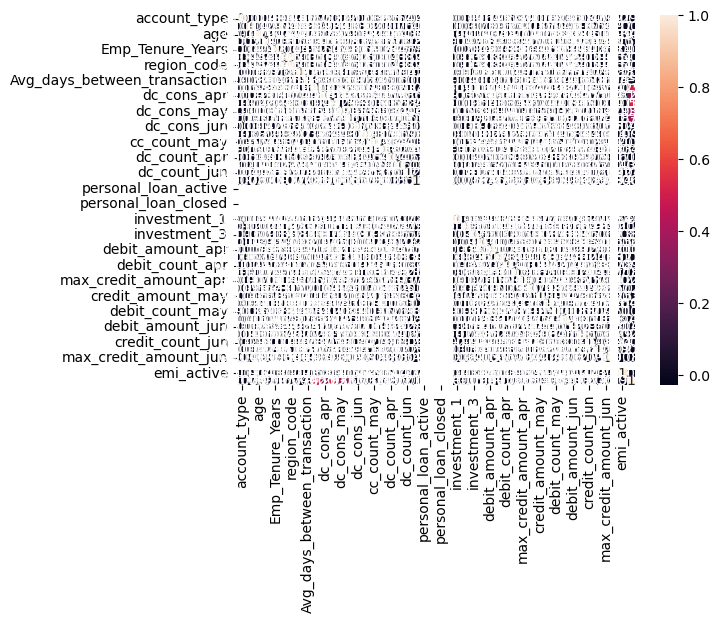

In [60]:
corr_matrix=train_data.corr()
sns.heatmap(corr_matrix,annot=True)


### STANDARDISATION

In [33]:
X=train_data.iloc[ : , :-1]
y=train_data['cc_cons']

In [35]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_std=pd.DataFrame(X_std)
X_std


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-0.422607,0.398433,-0.580790,0.689028,0.552186,1.217858,1.217858,-1.106157,-1.601713,-0.632861,...,2.082578,-0.517981,-0.076635,-0.281058,0.016572,0.590222,-1.015959,0.924819,0.0,-0.104415
1,-0.422607,0.398433,-0.352269,-0.879798,-0.038598,0.519945,0.519945,-0.515396,-1.601713,-0.407764,...,-0.707898,-0.814014,0.280878,-0.098282,2.810995,-0.549515,-1.186958,-0.287648,0.0,-0.101330
2,-0.422607,0.398433,-0.482852,0.689028,-0.589997,-1.573793,-1.573793,0.752469,-1.601713,-0.351884,...,-0.589155,-0.665997,0.554025,2.262973,0.251048,-0.475984,0.380534,-0.191247,0.0,-0.053665
3,-0.422607,0.398433,0.496524,-0.879798,-0.245373,0.170989,0.170989,1.202356,-1.601713,-0.588849,...,1.963834,0.074086,0.002810,-0.327637,-0.100524,-0.292155,-1.272457,-0.219308,0.0,-0.132438
4,2.366265,0.398433,-0.482852,0.689028,0.552186,0.170989,0.170989,-0.342712,-1.601713,0.279164,...,-0.648527,-0.962030,-0.193902,-0.074253,-0.108976,1.068176,-0.274963,-0.163833,0.0,-0.117654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.422607,-2.509835,0.170065,-0.879798,-0.555535,1.566814,1.566814,1.434117,0.624331,-0.472943,...,-0.648527,-0.394634,0.428863,11.341699,1.829791,1.399068,-0.588461,0.219105,0.0,0.536048
14996,-0.422607,0.398433,-0.123747,0.689028,0.050019,-0.526924,-0.526924,0.384379,0.624331,-0.499081,...,-0.529783,-0.912692,-0.121727,0.947783,0.360852,-0.696578,-1.101458,0.059081,0.0,-0.093278
14997,-0.422607,0.398433,-0.352269,0.689028,-0.673692,1.566814,1.566814,-0.928929,-1.601713,-0.332726,...,-0.589155,-0.172609,-0.179178,0.030875,-0.475711,-0.402452,-0.759460,-0.084866,0.0,-0.109262
14998,-0.422607,0.398433,5.621926,0.689028,0.182946,1.217858,1.217858,0.220784,-1.601713,-0.502303,...,-0.589155,0.986854,-0.035262,-0.386521,-0.062834,-0.623046,-0.901959,-0.408149,0.0,-0.023354


In [458]:
with open('./standard_scaler.pkl','wb') as file:
    pickle.dump(ss,file)

### TRAIN TEST SPLIT

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,random_state=34,test_size=0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12000, 47), (3000, 47), (12000,), (3000,))

### MODEL BUILDING

In [170]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
        

LinearRegression()

In [172]:
pred=lr.predict(X_test)
pred

array([ 8094.03165435, 17300.99093642, 10111.80022761, ...,
       10686.58239932,  6863.38945263,  5779.05703509])

In [174]:
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_test,pred)
rmpse=(rmse/np.mean(y_test))*100
rmpse

28.609334526640538

In [176]:
with open('./best_model.pkl','wb') as file:
    pickle.dump(lr,file)

In [256]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [262]:
pred1=dt.predict(X_test)
pred1

array([ 8127.6852,  9234.0094, 12913.7922, ...,  8250.5034,  3342.753 ,
        8972.8578])

In [264]:
from sklearn.metrics import root_mean_squared_error
rmse1=root_mean_squared_error(y_test,pred1)
rmpse1=(rmse1/np.mean(y_test))*100
rmpse1

69.27398808604256

In [272]:
from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor(max_depth=3,min_samples_split=200)
dt1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=200)

In [274]:
pred2=dt1.predict(X_test)
pred2

array([7075.70053422, 7075.70053422, 7075.70053422, ..., 7075.70053422,
       7075.70053422, 7075.70053422])

In [278]:
from sklearn.metrics import root_mean_squared_error
rmse2=root_mean_squared_error(y_test,pred2)
rmpse2=(rmse2/np.mean(y_test))*100
rmpse2

78.17036319295234

In [299]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [301]:
params={'max_depth':[3,4,5],
        'min_samples_split':[30,40,50]}
rs=RandomizedSearchCV(dt,params)
rs.fit(X_train,y_train)
rs.best_params_

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'min_samples_split': 30, 'max_depth': 5}

In [284]:
from sklearn.tree import DecisionTreeRegressor
dt2=DecisionTreeRegressor(max_depth=5,min_samples_split=30)
dt2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=30)

In [286]:
pred3=dt2.predict(X_test)
pred3

array([6581.42715547, 6581.42715547, 6581.42715547, ..., 6581.42715547,
       6581.42715547, 6581.42715547])

In [288]:
from sklearn.metrics import root_mean_squared_error
rmse2=root_mean_squared_error(y_test,pred3)
rmpse2=(rmse2/np.mean(y_test))*100
rmpse2

69.78755454311644

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [303]:
pred2=rf.predict(X_test)
pred2

array([ 7266.930274, 13807.783508, 11162.779759, ...,  9928.986405,
        7406.632071,  6434.315545])

In [305]:
rmse2=root_mean_squared_error(y_test,pred2)
rmpse2=(rmse2/np.mean(y_test))*100
rmpse2

33.73785780147837

In [126]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [128]:
pred=svr.predict(X_test)
pred

array([ 7490.16942974, 13214.6702047 ,  8865.58507402, ...,
        8953.51158371,  6910.57393192,  6001.29048615])

In [130]:
rmse2=root_mean_squared_error(y_test,pred)
rmpse2=(rmse2/np.mean(y_test))*100
rmpse2

42.77943122094407

In [52]:
from sklearn.linear_model import Ridge
l2=Ridge()
l2.fit(X_train,y_train)

Ridge()

In [56]:
pred=l2.predict(X_test)
pred

array([ 8095.02630374, 17299.49955416, 10111.92254873, ...,
       10686.75546966,  6861.89901568,  5780.66585221])

In [60]:
from sklearn.metrics import root_mean_squared_error
rmse2=root_mean_squared_error(y_test,pred)
rmpse2=(rmse2/np.mean(y_test))*100
rmpse2

28.609121968291685

In [112]:
from sklearn.linear_model import Ridge
l2=Ridge(solver='lsqr')
l2.fit(X_train,y_train)

Ridge(solver='lsqr')

In [114]:
pred=l2.predict(X_test)
pred

array([ 8095.21895536, 17299.49602186, 10112.12685823, ...,
       10686.96345696,  6861.779062  ,  5780.95774592])

In [116]:
from sklearn.metrics import root_mean_squared_error
rmse2=root_mean_squared_error(y_test,pred)
rmpse2=(rmse2/np.mean(y_test))*100
rmpse2

28.609098771813525

In [72]:
from sklearn.linear_model import ElasticNet
l3=ElasticNet()
l3.fit(X_train,y_train)


ElasticNet()

In [74]:
pred=l3.predict(X_test)
pred

array([ 8538.72834455, 14654.87486733,  9862.55339203, ...,
       10173.20398367,  7703.82073823,  7024.96134536])

In [76]:
from sklearn.metrics import root_mean_squared_error
rmse2=root_mean_squared_error(y_test,pred)
rmpse2=(rmse2/np.mean(y_test))*100
rmpse2

38.34109454538019

In [132]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [134]:
pred=knn.predict(X_test)
pred

array([5879.20166, 7812.39128, 7726.3817 , ..., 5705.21852, 5878.31912,
       5627.94398])

In [136]:
from sklearn.metrics import root_mean_squared_error
rmse2=root_mean_squared_error(y_test,pred)
rmpse2=(rmse2/np.mean(y_test))*100
rmpse2

53.08255370680298

In [139]:
!pip install xgboost

In [147]:
from xgboost import XGBRegressor
xgr= XGBRegressor()
xgr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [153]:
pred=xgr.predict(X_test)
pred

array([ 7359.3745, 17026.7   , 10404.553 , ..., 11448.782 ,  7230.2036,
        6769.49  ], dtype=float32)

In [155]:
from sklearn.metrics import root_mean_squared_error
rmse2=root_mean_squared_error(y_test,pred)
rmpse2=(rmse2/np.mean(y_test))*100
rmpse2

39.919480187478534

In [48]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'max_depth':[3,4,5,6,7,8,9,10],
        'min_samples_split':[30,40,50,60,70,80,90],
        'n_estimators' : [50,100,150,200,250,300,350,400],
        'max_features' : [3,4,5,6,7,8,9]}
gs=GridSearchCV(rf,params)
gs.fit(X_train,y_train)
gs.best_params_

In [159]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,max_depth=5,min_samples_split=50,max_features=6)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features=6, min_samples_split=50,
                      n_estimators=200)

In [161]:
pred2=rf.predict(X_test)
pred2

array([8421.95014539, 9436.56637102, 8626.46230289, ..., 8485.98604481,
       8340.92182087, 8543.67750756])

In [163]:
rmse2=root_mean_squared_error(y_test,pred2)
rmpse2=(rmse2/np.mean(y_test))*100
rmpse2

63.67630154317248

### FINAL PREDICTION

### DROP THE ID

In [178]:
predict_data.head(2)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
15000,17591,current,M,37,MEDIUM,11.9,4,4,575,1,...,20,9750.0,30527.88,31271.0,3,12,25945.92,Y,1170.49,NaN
15001,13541,current,M,33,MEDIUM,7.8,6,6,394,0,...,40,16967.0,14342.83,16582.0,6,39,12214.00,Y,16447.45,NaN


In [180]:
Final_df1=pd.DataFrame(predict_data['ID'])
Final_df1

,ID
15000,17591
15001,13541
15002,13431
15003,8687
15004,14727
...,...
19995,12512
19996,14224
19997,18740
19998,18134


In [182]:
predict_data.drop(columns=['ID'],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\1403607471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data.drop(columns=['ID'],inplace=True)


### NULL CHECK

In [184]:
predict_data.isnull().sum()

account_type                       0
gender                             0
age                                0
Income                             0
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        0
NetBanking_Flag                    0
Avg_days_between_transaction       0
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               0
vehicle_loan_closed                0
investment_1                       0
i

In [186]:
numerical_column=['cc_cons_may','dc_cons_jun']

In [188]:
for num in numerical_column:
    if predict_data[num].isnull().any():
        median=predict_data[num].median()
        predict_data[num].fillna(median,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\1780559931.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  predict_data[num].fillna(median,inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\1780559931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data[num].fillna(median,inplace=True)


In [472]:
predict_data.isnull().sum()

account_type                       0
gender                             0
age                                0
Income                             0
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        0
NetBanking_Flag                    0
Avg_days_between_transaction       0
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        0
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        0
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               0
vehicle_loan_closed                0
investment_1                       0
i

In [190]:
catagorical_column=['account_type','gender','loan_enq','Income']
for col in catagorical_column:
    predict_data[col].replace(0,predict_data[col].mode()[0],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\3087385924.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  predict_data[col].replace(0,predict_data[col].mode()[0],inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\3087385924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data[col].replace(0,predi

### CATEGORICAL TO NUMERICAL

In [192]:
predict_data

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
15000,current,M,37,MEDIUM,11.9,4,4,575,1,2795.450,...,20,9750.0,30527.88,31271.00,3,12,25945.92,Y,1170.49,NaN
15001,current,M,33,MEDIUM,7.8,6,6,394,0,29405.130,...,40,16967.0,14342.83,16582.00,6,39,12214.00,Y,16447.45,NaN
15002,current,M,53,LOW,33.0,10,10,324,1,5985.200,...,35,36398.0,32503.16,33539.54,5,9,13215.00,Y,2622.28,NaN
15003,current,M,33,MEDIUM,7.8,5,5,370,1,2105.930,...,5,97825.0,93572.42,109429.75,21,0,72317.00,Y,340.79,NaN
15004,current,M,62,LOW,12.6,9,9,505,1,3269.000,...,75,27936.0,19011.50,41401.00,6,35,42344.00,Y,2812.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,current,M,35,MEDIUM,13.5,1,1,523,0,4641.500,...,11,32944.0,105488.53,125470.83,21,50,58037.00,Y,7870.88,NaN
19996,current,M,53,MEDIUM,9.9,7,7,723,1,4994.450,...,8,8850.0,77112.66,86559.00,62,38,24110.00,Y,3668.30,NaN
19997,current,M,62,HIGH,37.8,8,8,863,1,3262.145,...,108,35819.0,57192.48,80627.00,2,18,1769.00,Y,5450.34,NaN
19998,current,M,34,MEDIUM,12.6,4,4,882,0,12824.010,...,12,39083.0,82039.00,24332.00,117,64,37255.00,Y,59.29,NaN


In [194]:
mapping_dict

{'current': 0,
 'saving': 1,
 'F': 0,
 'M': 1,
 'Y': 0,
 'HIGH': 0,
 'LOW': 1,
 'MEDIUM': 2}

In [196]:
catagorical_column=['account_type','gender','loan_enq','Income']
for col in catagorical_column:
    predict_data[col]=predict_data[col].apply(lambda x:mapping_dict[x])
predict_data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_28932\3808054744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data[col]=predict_data[col].apply(lambda x:mapping_dict[x])


,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
15000,0,1,37,2,11.9,4,4,575,1,2795.450,...,20,9750.0,30527.88,31271.00,3,12,25945.92,0,1170.49,NaN
15001,0,1,33,2,7.8,6,6,394,0,29405.130,...,40,16967.0,14342.83,16582.00,6,39,12214.00,0,16447.45,NaN
15002,0,1,53,1,33.0,10,10,324,1,5985.200,...,35,36398.0,32503.16,33539.54,5,9,13215.00,0,2622.28,NaN
15003,0,1,33,2,7.8,5,5,370,1,2105.930,...,5,97825.0,93572.42,109429.75,21,0,72317.00,0,340.79,NaN
15004,0,1,62,1,12.6,9,9,505,1,3269.000,...,75,27936.0,19011.50,41401.00,6,35,42344.00,0,2812.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,35,2,13.5,1,1,523,0,4641.500,...,11,32944.0,105488.53,125470.83,21,50,58037.00,0,7870.88,NaN
19996,0,1,53,2,9.9,7,7,723,1,4994.450,...,8,8850.0,77112.66,86559.00,62,38,24110.00,0,3668.30,NaN
19997,0,1,62,0,37.8,8,8,863,1,3262.145,...,108,35819.0,57192.48,80627.00,2,18,1769.00,0,5450.34,NaN
19998,0,1,34,2,12.6,4,4,882,0,12824.010,...,12,39083.0,82039.00,24332.00,117,64,37255.00,0,59.29,NaN


In [ ]:
catagorical_column=['account_type','gender','loan_enq','Income']

In [192]:
predict_data['account_type'].unique()

array(['current', 'saving', 0], dtype=object)

In [196]:
predict_data['gender'].unique()

array(['M', 'F', 0], dtype=object)

In [198]:
predict_data['loan_enq'].unique()

array(['Y'], dtype=object)

In [200]:
predict_data['Income'].unique()

array(['MEDIUM', 'LOW', 'HIGH', 0], dtype=object)

### STANDARDIZATION

In [198]:
with open('./standard_scaler.pkl','rb') as file:
          ss=pickle.load(file)

In [200]:
ss

StandardScaler()

In [202]:
X1=predict_data.iloc[ : , :-1]
y1=predict_data['cc_cons']

In [204]:
X_std=ss.fit_transform(X1)
X_std=pd.DataFrame(X_std)
X_std

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-0.43676,0.388945,-0.349472,0.700479,-0.162873,-0.504229,-0.504229,-0.115585,0.633828,-0.588787,...,0.715912,-0.514582,-0.221689,-0.130399,-0.268184,-0.630552,-0.917856,-0.183360,0.0,-0.103476
1,-0.43676,0.388945,-0.484960,0.700479,-0.358303,0.189251,0.189251,-0.936940,-1.577715,0.472668,...,1.840686,-0.022366,-0.190633,-0.169860,-0.349429,-0.517837,-0.147574,-0.274279,0.0,0.016820
2,-0.43676,0.388945,0.192481,-0.856141,0.842876,1.576209,1.576209,-1.254592,0.633828,-0.461548,...,1.781487,-0.145420,-0.107019,-0.125583,-0.255636,-0.555409,-1.003442,-0.267651,0.0,-0.092044
3,-0.43676,0.388945,-0.484960,0.700479,-0.358303,-0.157489,-0.157489,-1.045849,0.633828,-0.616291,...,-0.527258,-0.883744,0.157308,0.023310,0.164114,0.045740,-1.260203,0.123661,0.0,-0.110009
4,-0.43676,0.388945,0.497330,-0.856141,-0.129507,1.229470,1.229470,-0.433236,0.633828,-0.569897,...,3.439048,0.839011,-0.143432,-0.158477,-0.212154,-0.517837,-0.261690,-0.074789,0.0,-0.090549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.43676,0.388945,-0.417216,0.700479,-0.086608,-1.544448,-1.544448,-0.351555,-1.577715,-0.515148,...,1.367097,-0.736079,-0.121882,0.052363,0.252837,0.045740,0.166244,0.029114,0.0,-0.050715
4996,-0.43676,0.388945,0.192481,0.700479,-0.258205,0.535990,0.535990,0.556020,0.633828,-0.501069,...,-0.408861,-0.809912,-0.225562,-0.016820,0.037615,1.586183,-0.176103,-0.195516,0.0,-0.083807
4997,-0.43676,0.388945,0.497330,-2.412762,1.071672,0.882730,0.882730,1.191323,0.633828,-0.570170,...,-0.112868,1.651167,-0.109511,-0.065388,0.004805,-0.668124,-0.746682,-0.343435,0.0,-0.069775
4998,-0.43676,0.388945,-0.451088,0.700479,-0.129507,-0.504229,-0.504229,1.277542,-1.577715,-0.188750,...,-0.053669,-0.711468,-0.095466,-0.004809,-0.306563,3.652631,0.565649,-0.108483,0.0,-0.112226


### PREDICTION

In [206]:
with open('./best_model.pkl','rb') as file:
          lr=pickle.load(file)

In [210]:
pred1=lr.predict(X_std)
pred1

array([2862.4873112 , 6583.59010854, 2192.64677641, ..., 4708.07385134,
       6796.10794686, 6310.72832705])

In [212]:
pred_df=pd.DataFrame(pred1)
pred_df

,0
0,2862.487311
1,6583.590109
2,2192.646776
3,9120.411065
4,2436.175710
...,...
4995,9163.009561
4996,5980.883542
4997,4708.073851
4998,6796.107947


In [214]:
Final_df1.reset_index(drop=True,inplace=True)
Final_df1

,ID
0,17591
1,13541
2,13431
3,8687
4,14727
...,...
4995,12512
4996,14224
4997,18740
4998,18134


In [218]:
submission_df=pd.concat([Final_df1,pred_df],axis=1)
submission_df

,ID,0
0,17591,2862.487311
1,13541,6583.590109
2,13431,2192.646776
3,8687,9120.411065
4,14727,2436.175710
...,...,...
4995,12512,9163.009561
4996,14224,5980.883542
4997,18740,4708.073851
4998,18134,6796.107947


In [220]:
submission_df.to_csv('Submission',index=False)